<a href="https://colab.research.google.com/github/rhks13/Remote-Internship/blob/main/2_EDA_%EB%B0%8F_%ED%8C%8C%EC%83%9D%EB%B3%80%EC%88%98_%EC%83%9D%EC%84%B1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 이 친구를 한번 돌리고 런타임 재실행까지 시켜주어야 
# 그래프에서 한글이 이쁘게 보입니다.
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 5 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (6,575 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle as pickle
import datetime

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/cj E2-3/data/병합데이터.csv', index_col=0)

# **결측치 파악**

In [ ]:
# 전체적인 결측치를 파악해볼까요
df.isnull().sum()

#기온, 시정, 지면온도에 하나씩 존재합니다. 이정도면 결측치를 삭제한대도 문제가 없을 것 같아요

일시            0
요일            0
사고내용          0
사고유형          0
노면상태          0
도로형태          0
가해운전자 차종      0
가해운전자 성별      0
가해운전자 연령      0
가해운전자 상해정도    0
시             0
읍면동           0
기온(°C)        1
풍속(m/s)       0
습도(%)         0
현지기압(hPa)     0
시정(10m)       1
지면온도(°C)      1
비             0
눈             0
dtype: int64

In [ ]:
# 결측치를 제거해줍니다
df_one = df.dropna() # 데이터.dropna() => 결측치가 존재하는 행 삭제

In [ ]:
df_one.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2735 entries, 0 to 2737
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   일시          2735 non-null   object 
 1   요일          2735 non-null   object 
 2   사고내용        2735 non-null   int64  
 3   사고유형        2735 non-null   object 
 4   노면상태        2735 non-null   object 
 5   도로형태        2735 non-null   object 
 6   가해운전자 차종    2735 non-null   object 
 7   가해운전자 성별    2735 non-null   object 
 8   가해운전자 연령    2735 non-null   object 
 9   가해운전자 상해정도  2735 non-null   object 
 10  시           2735 non-null   object 
 11  읍면동         2735 non-null   object 
 12  기온(°C)      2735 non-null   float64
 13  풍속(m/s)     2735 non-null   float64
 14  습도(%)       2735 non-null   float64
 15  현지기압(hPa)   2735 non-null   float64
 16  시정(10m)     2735 non-null   float64
 17  지면온도(°C)    2735 non-null   float64
 18  비           2735 non-null   int64  
 19  눈           2735 non-null  

# **변수별 특성 파악**

### **요일**

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47785 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50836 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54868 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50900 missing from current font.
  font.set_

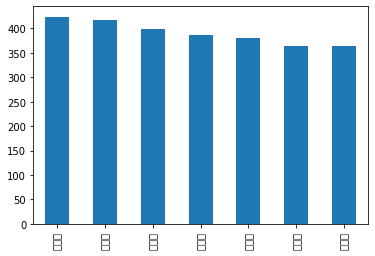

In [ ]:
df_one['요일'].value_counts().plot(kind='bar')

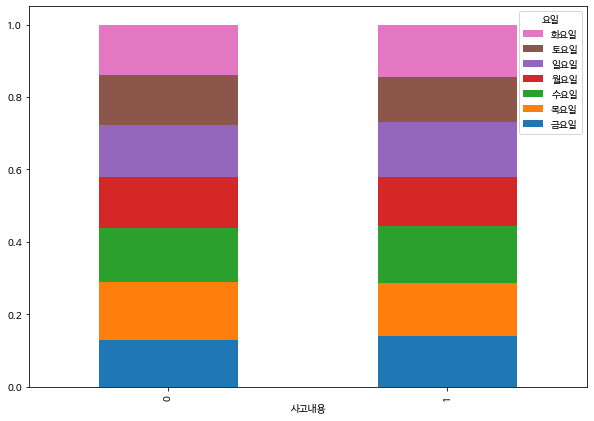

In [ ]:

df_obj=df_one.groupby(['사고내용','요일']).count()['일시']
df_por=df_obj.unstack().T/df_obj.groupby('사고내용').sum()
df_por.T.plot.bar(stacked=True, legend='reverse', figsize=(10,7))

In [ ]:
 # 단순 요일로 구분했을때는 특징이 드러나지 않아 -> 주말(공휴일)/ 평일로 구분하는 새로운 변수 생성

### **사고유형**

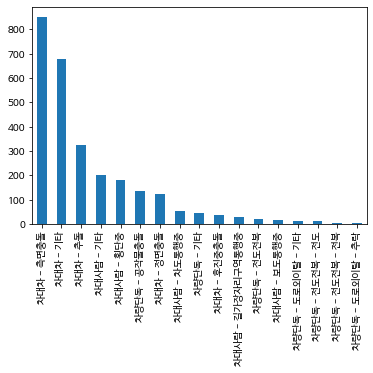

In [ ]:
df_one['사고유형'].value_counts().plot(kind='bar')

In [ ]:
# 주말(공휴일)/ 평일로 구분하는 새로운 변수 생성
# 사고유형 

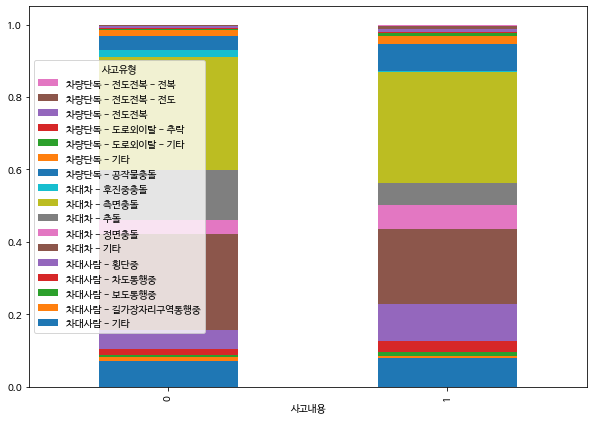

In [ ]:
df_obj=df_one.groupby(['사고내용','사고유형']).count()['일시']
df_por=df_obj.unstack().T/df_obj.groupby('사고내용').sum()
df_por.T.plot.bar(stacked=True, legend='reverse', figsize=(10,7))

# 해석하기에 어려움 => 조정 필요

In [ ]:
def spl1(a):
  b = a.split(' - ')
  return b[0]

def spl2(a):
  b = a.split(' - ')
  return b[1]

In [ ]:
df_one['사고유형'].apply(spl1)

0        차대차
1       차대사람
2       차량단독
3        차대차
4       차량단독
        ... 
2733    차대사람
2734    차대사람
2735     차대차
2736     차대차
2737     차대차
Name: 사고유형, Length: 2735, dtype: object

In [ ]:
df_temp = df_one.copy()

In [ ]:
df_temp['유형1'] = df_one['사고유형'].apply(spl1)
df_temp['유형2'] = df_one['사고유형'].apply(spl2)

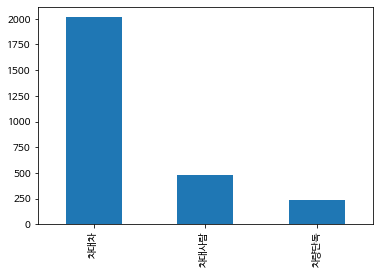

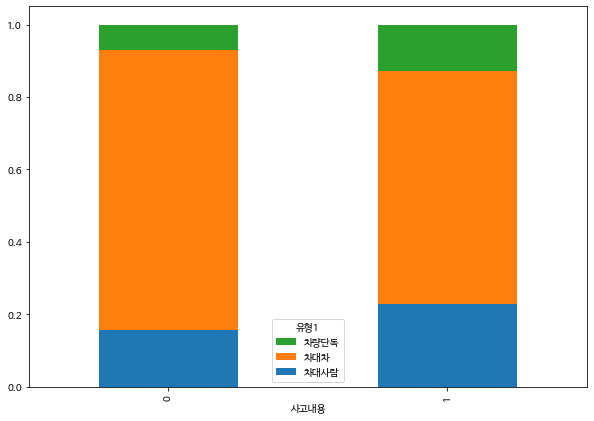

In [ ]:
df_temp['유형1'].value_counts().plot(kind='bar')
df_obj=df_temp.groupby(['사고내용','유형1']).count()['일시']
df_por=df_obj.unstack().T/df_obj.groupby('사고내용').sum()
df_por.T.plot.bar(stacked=True, legend='reverse', figsize=(10,7))

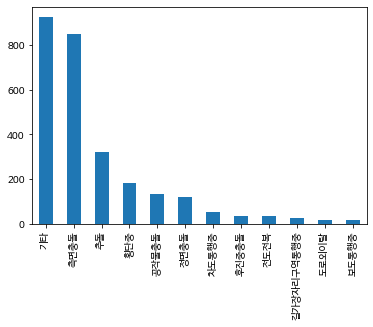

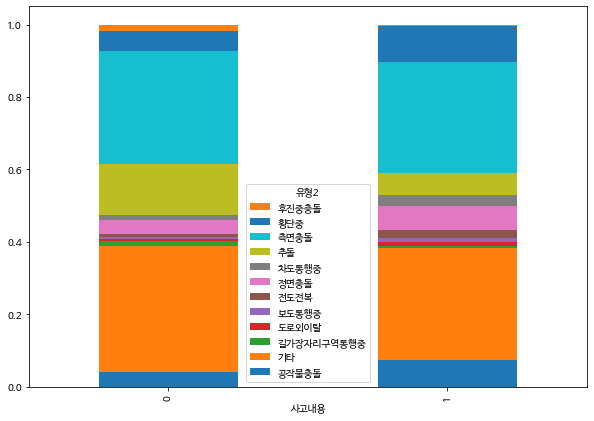

In [ ]:
df_temp['유형2'].value_counts().plot(kind='bar')
df_obj=df_temp.groupby(['사고내용','유형2']).count()['일시']
df_por=df_obj.unstack().T/df_obj.groupby('사고내용').sum()
df_por.T.plot.bar(stacked=True, legend='reverse', figsize=(10,7))

### **노면상태**

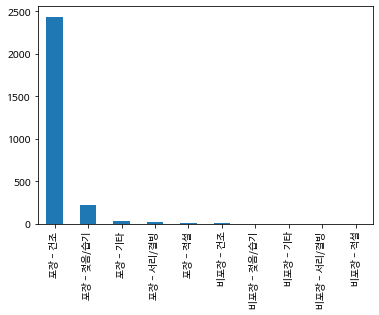

In [ ]:
df_one['노면상태'].value_counts().plot(kind='bar')

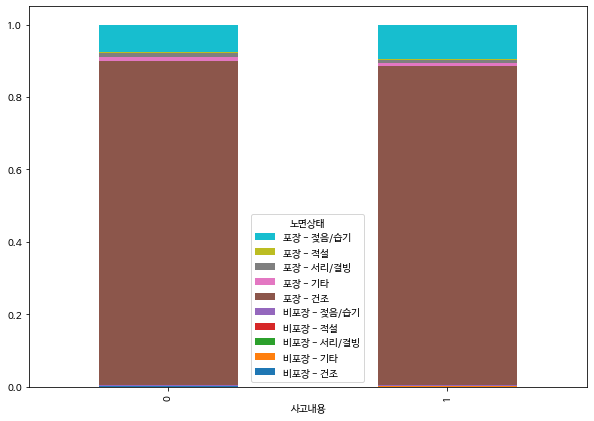

In [ ]:
df_obj=df_one.groupby(['사고내용','노면상태']).count()['일시']
df_por=df_obj.unstack().T/df_obj.groupby('사고내용').sum()
df_por.T.plot.bar(stacked=True, legend='reverse', figsize=(10,7))

In [ ]:
# 비포장이 애초에 거의 존재하지 않아 -> 비포장 데이터 삭제, 하이픈 뒤의 노면상태만 기록

### **도로 형태**

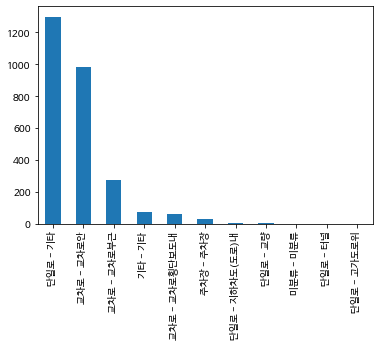

In [ ]:
df_one['도로형태'].value_counts().plot(kind='bar')

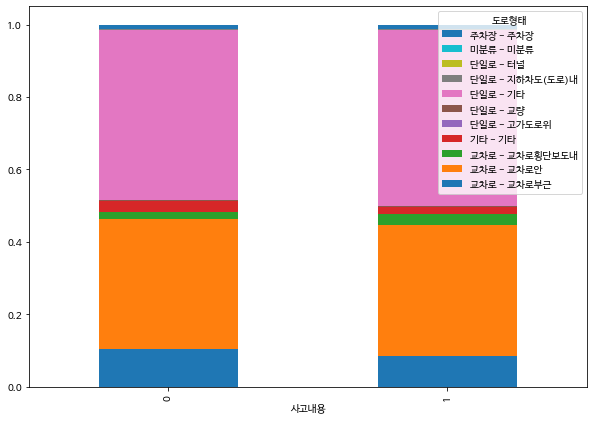

In [ ]:

df_obj=df_one.groupby(['사고내용','도로형태']).count()['일시']
df_por=df_obj.unstack().T/df_obj.groupby('사고내용').sum()
df_por.T.plot.bar(stacked=True, legend='reverse', figsize=(10,7))

### **가해운전자 차종**

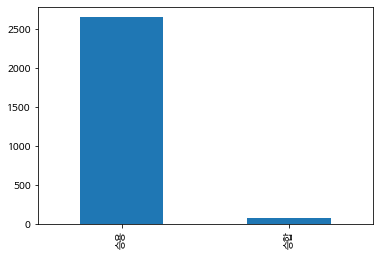

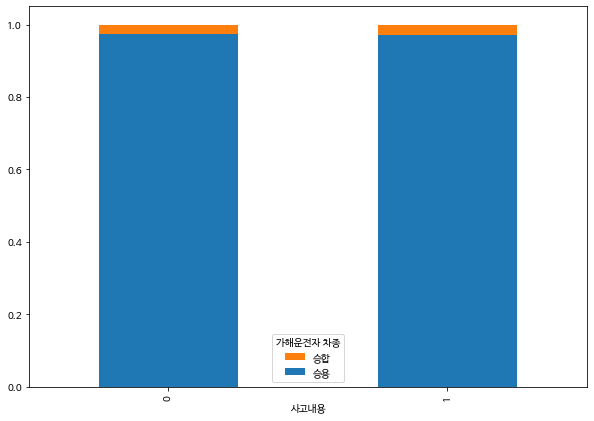

In [ ]:
df_one['가해운전자 차종'].value_counts().plot(kind='bar')
df_obj=df_one.groupby(['사고내용','가해운전자 차종']).count()['일시']
df_por=df_obj.unstack().T/df_obj.groupby('사고내용').sum()
df_por.T.plot.bar(stacked=True, legend='reverse', figsize=(10,7))

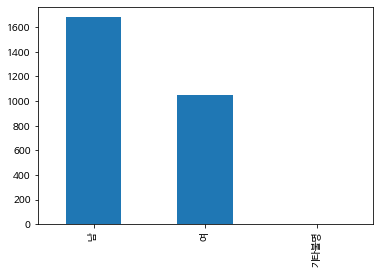

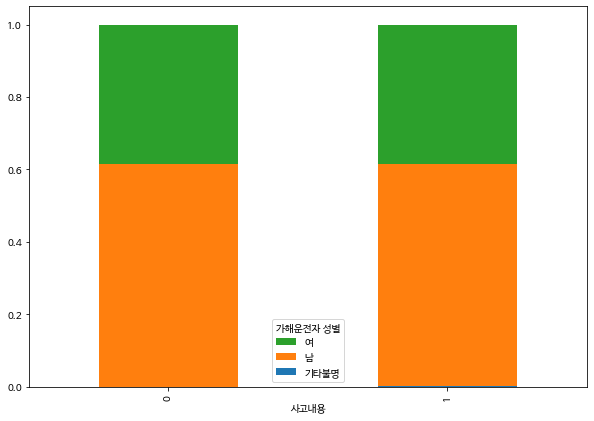

In [ ]:
df_one['가해운전자 성별'].value_counts().plot(kind='bar')
df_obj=df_one.groupby(['사고내용','가해운전자 성별']).count()['일시']
df_por=df_obj.unstack().T/df_obj.groupby('사고내용').sum()
df_por.T.plot.bar(stacked=True, legend='reverse', figsize=(10,7))

### **가해 운전자 연령**

Text(0.5, 1.0, 'sub_cluster')

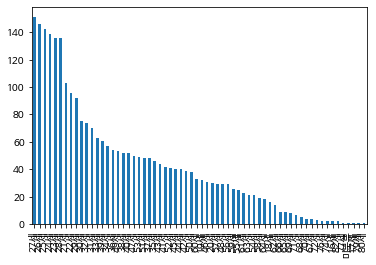

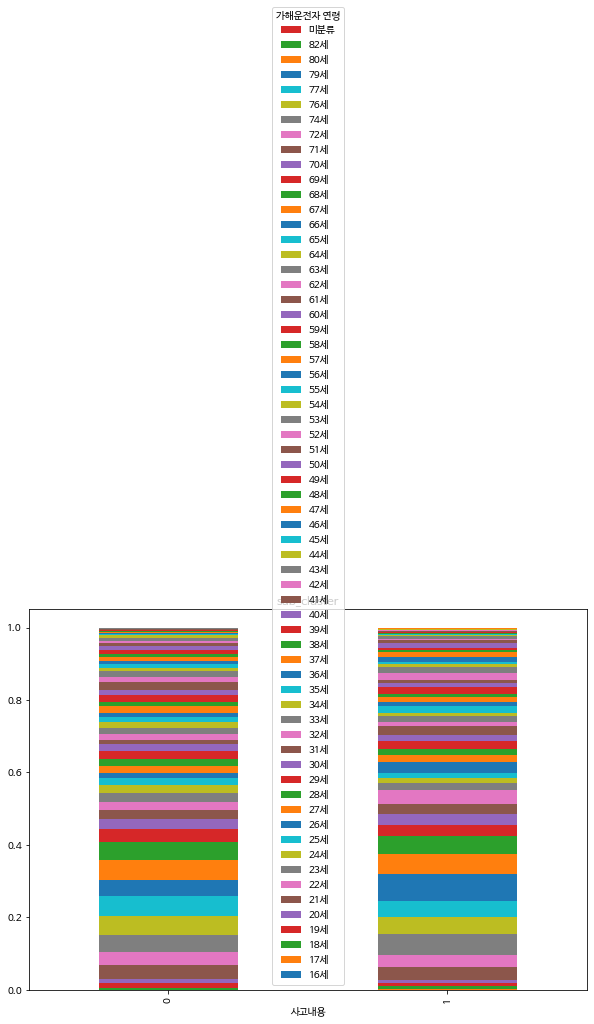

In [ ]:
df_one['가해운전자 연령'].value_counts().plot(kind='bar')
df_obj=df_one.groupby(['사고내용','가해운전자 연령']).count()['일시']
df_por=df_obj.unstack().T/df_obj.groupby('사고내용').sum()
df_por.T.plot.bar(stacked=True, legend='reverse', figsize=(10,7))
plt.title('sub_cluster')

### **가해운전자 상해정도**

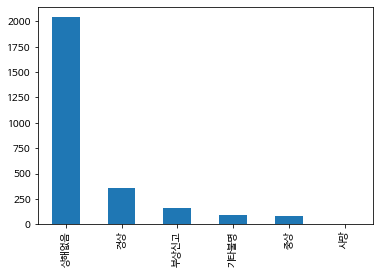

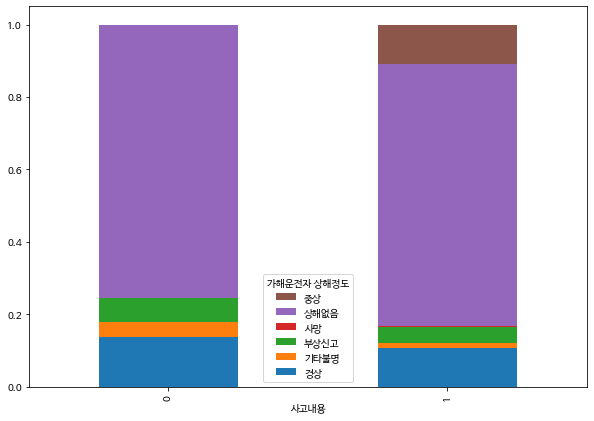

In [ ]:
df_one['가해운전자 상해정도'].value_counts().plot(kind='bar')
df_obj=df_one.groupby(['사고내용','가해운전자 상해정도']).count()['일시']
df_por=df_obj.unstack().T/df_obj.groupby('사고내용').sum()
df_por.T.plot.bar(stacked=True, legend='reverse', figsize=(10,7))

### **사고 지역**

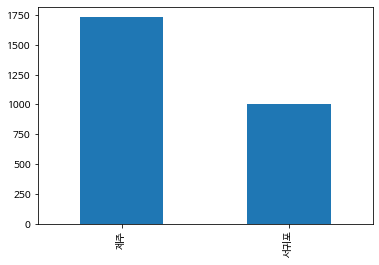

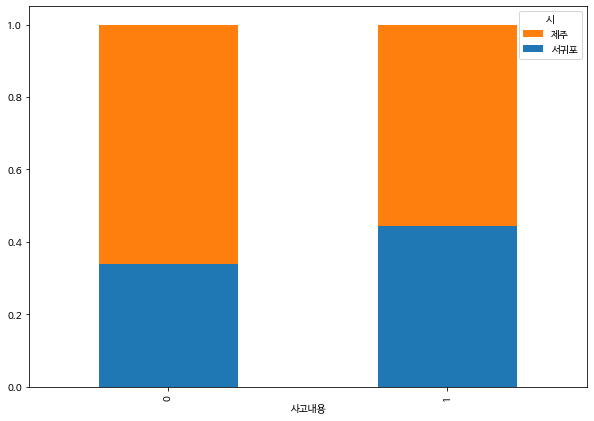

In [ ]:
df_one['시'].value_counts().plot(kind='bar')
df_obj=df_one.groupby(['사고내용','시']).count()['일시']
df_por=df_obj.unstack().T/df_obj.groupby('사고내용').sum()
df_por.T.plot.bar(stacked=True, legend='reverse', figsize=(10,7))

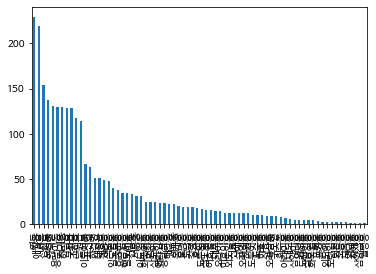

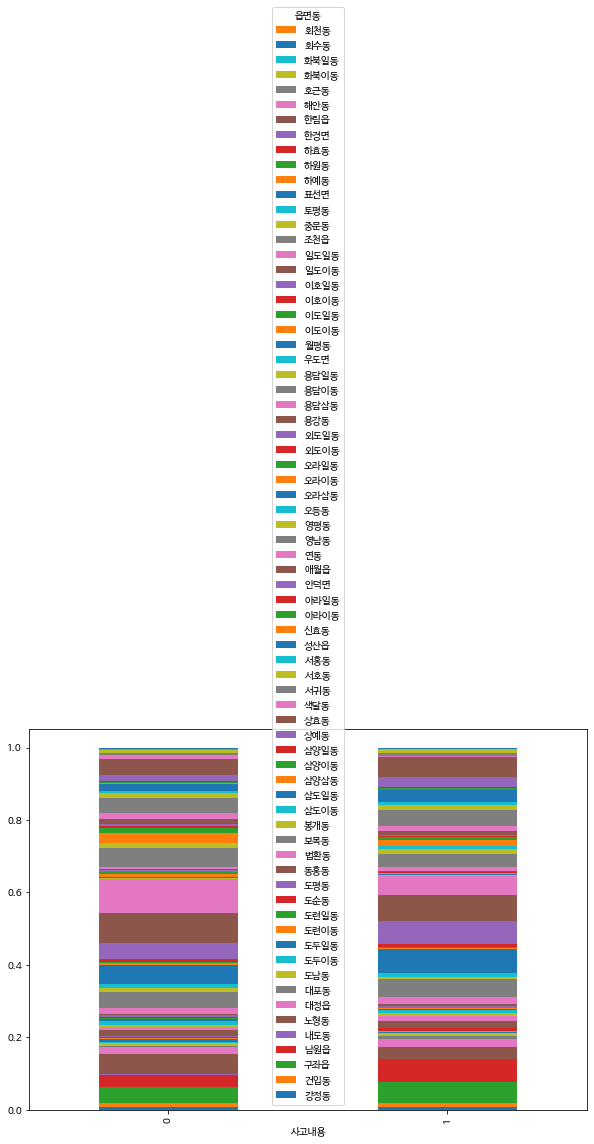

In [ ]:
df_one['읍면동'].value_counts().plot(kind='bar')
df_obj=df_one.groupby(['사고내용','읍면동']).count()['일시']
df_por=df_obj.unstack().T/df_obj.groupby('사고내용').sum()
df_por.T.plot.bar(stacked=True, legend='reverse', figsize=(10,7))

# **날씨 변수**

(array([ 35.,  89., 201., 327., 346., 394., 474., 454., 333.,  82.]),
 array([-2.3 ,  1.35,  5.  ,  8.65, 12.3 , 15.95, 19.6 , 23.25, 26.9 ,
        30.55, 34.2 ]),
 <a list of 10 Patch objects>)

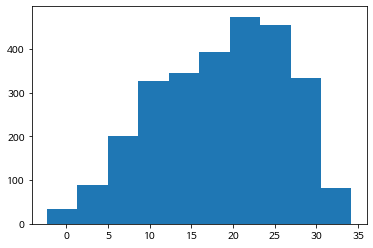

In [ ]:
plt.hist(df_one['기온(°C)'])



(array([ 10.,  26.,  48.,  76.,  89., 114., 122., 123.,  92.,  28.]),
 array([-2.1 ,  1.46,  5.02,  8.58, 12.14, 15.7 , 19.26, 22.82, 26.38,
        29.94, 33.5 ]),
 <a list of 10 Patch objects>)

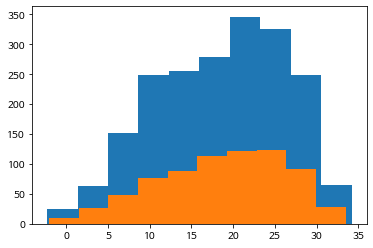

In [ ]:
plt.hist(df_one.loc[df_one['사고내용']==0,'기온(°C)'])
plt.hist(df_one.loc[df_one['사고내용']==1,'기온(°C)'])

(array([ 96., 208., 179., 122.,  74.,  30.,  12.,   3.,   2.,   2.]),
 array([ 0.  ,  1.05,  2.1 ,  3.15,  4.2 ,  5.25,  6.3 ,  7.35,  8.4 ,
         9.45, 10.5 ]),
 <a list of 10 Patch objects>)

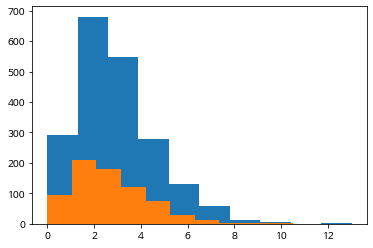

In [ ]:
plt.hist(df_one.loc[df_one['사고내용']==0,'풍속(m/s)'])
plt.hist(df_one.loc[df_one['사고내용']==1,'풍속(m/s)'])

(array([  1.,   4.,  12.,  42.,  78., 135., 130., 109., 107., 110.]),
 array([13. , 21.6, 30.2, 38.8, 47.4, 56. , 64.6, 73.2, 81.8, 90.4, 99. ]),
 <a list of 10 Patch objects>)

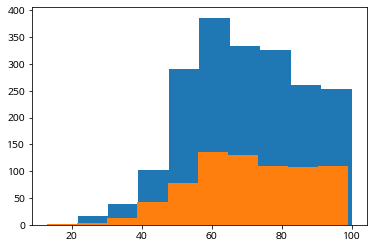

In [ ]:
plt.hist(df_one.loc[df_one['사고내용']==0,'습도(%)'])
plt.hist(df_one.loc[df_one['사고내용']==1,'습도(%)'])

(array([  9.,  25.,  75., 137., 135., 135., 108.,  72.,  27.,   5.]),
 array([ 990.9 ,  995.11,  999.32, 1003.53, 1007.74, 1011.95, 1016.16,
        1020.37, 1024.58, 1028.79, 1033.  ]),
 <a list of 10 Patch objects>)

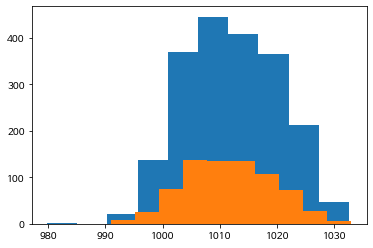

In [ ]:
plt.hist(df_one.loc[df_one['사고내용']==0,'현지기압(hPa)'])
plt.hist(df_one.loc[df_one['사고내용']==1,'현지기압(hPa)'])

(array([ 30.,  60.,  74., 542.,   6.,   2.,   0.,   5.,   2.,   7.]),
 array([ 163. ,  646.7, 1130.4, 1614.1, 2097.8, 2581.5, 3065.2, 3548.9,
        4032.6, 4516.3, 5000. ]),
 <a list of 10 Patch objects>)

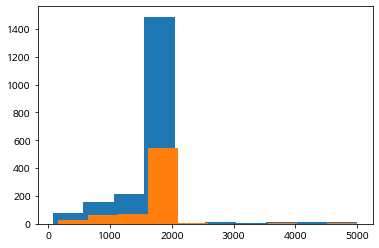

In [ ]:
plt.hist(df_one.loc[df_one['사고내용']==0,'시정(10m)'])
plt.hist(df_one.loc[df_one['사고내용']==1,'시정(10m)'])

(array([ 47.,  99.,  85., 125., 148., 143.,  54.,  16.,   4.,   7.]),
 array([-0.5 ,  5.45, 11.4 , 17.35, 23.3 , 29.25, 35.2 , 41.15, 47.1 ,
        53.05, 59.  ]),
 <a list of 10 Patch objects>)

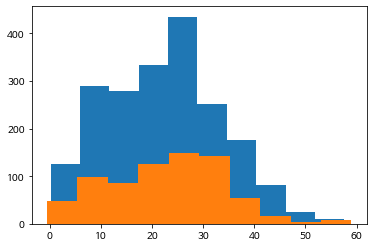

In [ ]:
plt.hist(df_one.loc[df_one['사고내용']==0,'지면온도(°C)'])
plt.hist(df_one.loc[df_one['사고내용']==1,'지면온도(°C)'])

(array([413.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 315.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

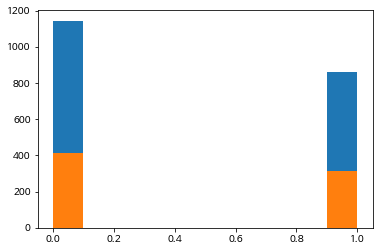

In [ ]:
plt.hist(df_one.loc[df_one['사고내용']==0,'비'])
plt.hist(df_one.loc[df_one['사고내용']==1,'비'])

(array([703.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  25.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

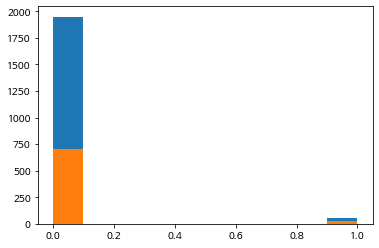

In [ ]:
plt.hist(df_one.loc[df_one['사고내용']==0,'눈'])
plt.hist(df_one.loc[df_one['사고내용']==1,'눈'])

# **파생변수 생성/ 기존변수 조정**

### 주말+공휴일 / 평일 구분 변수 생성

In [ ]:
df_one['요일']

0       일요일
1       일요일
2       일요일
3       월요일
4       화요일
       ... 
2733    화요일
2734    수요일
2735    수요일
2736    목요일
2737    금요일
Name: 요일, Length: 2735, dtype: object

In [ ]:
df_one.loc[df_one['요일'].isin(['일요일', '토요일'])==False, '요일'] = 0
df_one.loc[df_one['요일'].isin(['일요일', '토요일']), '요일'] = 1

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [ ]:
df_one

,일시,요일,사고내용,사고유형,노면상태,도로형태,가해운전자 차종,가해운전자 성별,가해운전자 연령,가해운전자 상해정도,시,읍면동,기온(°C),풍속(m/s),습도(%),현지기압(hPa),시정(10m),지면온도(°C),비,눈
0,2017-01-01 15:00:00,1,0,차대차 - 기타,포장 - 건조,기타 - 기타,승용,남,29세,상해없음,제주,애월읍,11.9,3.4,63.0,1024.6,2000.0,12.4,0,0
1,2017-01-01 18:00:00,1,1,차대사람 - 차도통행중,포장 - 건조,단일로 - 기타,승용,남,42세,상해없음,제주,삼도이동,10.7,1.4,69.0,1023.7,2000.0,8.8,0,0
2,2017-01-01 21:00:00,1,1,차량단독 - 전도전복,포장 - 건조,교차로 - 교차로안,승용,남,47세,중상,서귀포,남원읍,11.2,0.7,70.0,1019.6,2000.0,9.1,0,0
3,2017-01-02 10:00:00,0,0,차대차 - 측면충돌,포장 - 건조,교차로 - 교차로안,승용,남,24세,상해없음,서귀포,성산읍,11.9,0.2,90.0,1017.2,1494.0,10.7,1,0
4,2017-01-03 21:00:00,0,0,차량단독 - 공작물충돌,포장 - 건조,단일로 - 기타,승용,남,20세,상해없음,서귀포,성산읍,10.5,1.1,76.0,1017.4,1266.0,7.9,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2733,2021-12-28 12:00:00,0,0,차대사람 - 횡단중,포장 - 건조,교차로 - 교차로부근,승용,남,57세,상해없음,제주,일도이동,8.0,2.5,60.0,1027.2,4660.0,6.9,0,1
2734,2021-12-29 11:00:00,0,0,차대사람 - 횡단중,포장 - 건조,단일로 - 기타,승용,여,21세,상해없음,제주,일도일동,10.9,5.4,57.0,1020.8,2380.0,9.2,1,0
2735,2021-12-29 14:00:00,0,0,차대차 - 측면충돌,포장 - 건조,단일로 - 기타,승용,여,22세,상해없음,제주,한림읍,10.4,5.7,60.0,1018.4,1749.0,10.3,1,0
2736,2021-12-30 12:00:00,0,0,차대차 - 기타,포장 - 건조,단일로 - 기타,승용,남,22세,상해없음,서귀포,색달동,8.2,3.7,45.0,1018.5,2000.0,9.9,1,0


In [ ]:
!pip install pytimekr
from pytimekr import pytimekr

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for pytimekr: filename=pytimekr-0.1.0-py3-none-any.whl size=7940 sha256=d1f9767081ca50a1702b46cc42a48ce36202b2df660672c911fb4d5cf20b6a00
  Stored in directory: /root/.cache/pip/wheels/7c/54/31/d099bce210ce51c45eeb97e149699dedc66c78eb84c01be9c2
Successfully built pytimekr


In [ ]:
# 공휴일 출력
hol_list = []
hol_list.append(pytimekr.holidays(2017))
hol_list.append(pytimekr.holidays(2018))
hol_list.append(pytimekr.holidays(2019))
hol_list.append(pytimekr.holidays(2020))
hol_list.append(pytimekr.holidays(2021))

In [ ]:
# 2차원 리스트 -> 1차원
import itertools
holiday = np.concatenate(hol_list).tolist()

In [ ]:
# 1차원 리스트 생성 완
holiday

[datetime.date(2017, 1, 27),
 datetime.date(2017, 1, 28),
 datetime.date(2017, 1, 29),
 datetime.date(2017, 10, 3),
 datetime.date(2017, 10, 4),
 datetime.date(2017, 10, 5),
 datetime.date(2017, 1, 1),
 datetime.date(2017, 3, 1),
 datetime.date(2017, 5, 5),
 datetime.date(2017, 5, 3),
 datetime.date(2017, 6, 6),
 datetime.date(2017, 8, 15),
 datetime.date(2017, 10, 9),
 datetime.date(2017, 10, 3),
 datetime.date(2017, 12, 25),
 datetime.date(2018, 2, 15),
 datetime.date(2018, 2, 16),
 datetime.date(2018, 2, 17),
 datetime.date(2018, 9, 23),
 datetime.date(2018, 9, 24),
 datetime.date(2018, 9, 25),
 datetime.date(2018, 1, 1),
 datetime.date(2018, 3, 1),
 datetime.date(2018, 5, 5),
 datetime.date(2018, 5, 22),
 datetime.date(2018, 6, 6),
 datetime.date(2018, 8, 15),
 datetime.date(2018, 10, 9),
 datetime.date(2018, 10, 3),
 datetime.date(2018, 12, 25),
 datetime.date(2019, 2, 4),
 datetime.date(2019, 2, 5),
 datetime.date(2019, 2, 6),
 datetime.date(2019, 9, 12),
 datetime.date(2019, 9, 

In [ ]:
df_one['요일'].sum()

763

In [ ]:
def hol(a):
  if(a in(holiday)):
    return 1
  else:
    return 0

In [ ]:
df_one.loc[:,'요일'] = df_one['요일']+df_one['일시'].apply(hol)
df_one.loc[df_one['요일']==2,'요일']= 1

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [ ]:
df_one['요일'].sum()

763

In [ ]:
df_one.rename(columns={'요일':'주말/공휴일'},inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


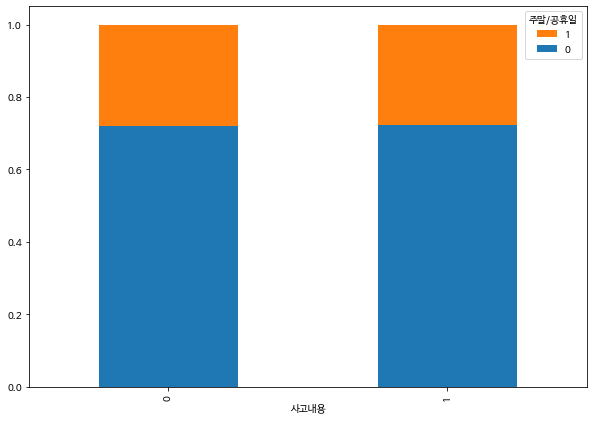

In [ ]:
df_obj=df_one.groupby(['사고내용','주말/공휴일']).count()['일시']
df_por=df_obj.unstack().T/df_obj.groupby('사고내용').sum()
df_por.T.plot.bar(stacked=True, legend='reverse', figsize=(10,7))

### **나이 -> int 형으로 변환**

In [ ]:
df_one['가해운전자 연령'].unique()

array(['29세', '42세', '47세', '24세', '20세', '37세', '28세', '45세', '57세',
       '34세', '32세', '41세', '54세', '30세', '35세', '25세', '49세', '18세',
       '22세', '27세', '36세', '50세', '52세', '31세', '55세', '43세', '61세',
       '21세', '53세', '56세', '23세', '19세', '71세', '40세', '39세', '26세',
       '38세', '64세', '51세', '44세', '33세', '48세', '46세', '59세', '69세',
       '60세', '63세', '62세', '58세', '76세', '66세', '70세', '72세', '67세',
       '68세', '77세', '65세', '미분류', '74세', '17세', '16세', '79세', '82세',
       '80세'], dtype=object)

In [ ]:
# 미분류 삭제

In [ ]:
(df_one['가해운전자 연령']=='미분류').sum()

1

In [ ]:
df_one = df_one.loc[(df_one['가해운전자 연령']=='미분류')==False]

In [ ]:
def intly(a):
  return a[:-1]

In [ ]:
df_one.loc[:,'가해운전자 연령']=(df_one['가해운전자 연령'].apply(intly)).astype(int)

### **노면상태 간략화**

In [ ]:
def pojang(a):
  b = a.split(" - ")
  return b[0]

def state(a):
  b = a.split(" - ")
  return b[1]

In [ ]:
df_one['포장'] = df_one['노면상태'].apply(pojang)
df_one['도로상태'] = df_one['노면상태'].apply(state)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df_one = df_one[(df_one['포장']=='비포장')==False]

In [ ]:
df_one.pop('노면상태')
df_one.pop('포장')

0       포장
1       포장
2       포장
3       포장
4       포장
        ..
2733    포장
2734    포장
2735    포장
2736    포장
2737    포장
Name: 포장, Length: 2723, dtype: object

### **사고유형 간략화**

In [ ]:
def actype(a):
  b = a.split(" - ")
  return b[0]

def actype2(a):
  b = a.split(" - ")
  return b[1]

In [ ]:
df_one['사고유형1'] = df_one['사고유형'].apply(actype)

In [ ]:
df_one['사고유형2'] = df_one['사고유형'].apply(actype2)

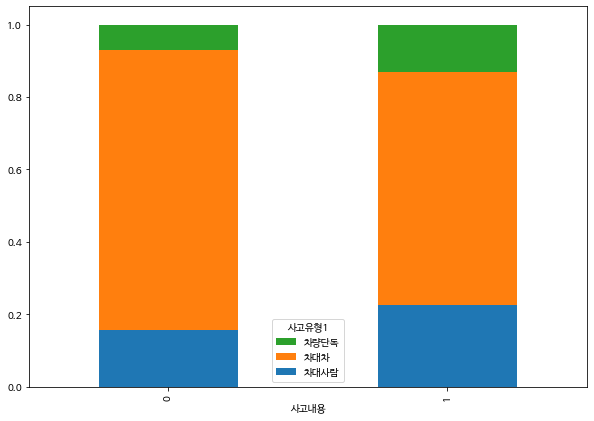

In [ ]:
df_obj=df_one.groupby(['사고내용','사고유형1']).count()['일시']
df_por=df_obj.unstack().T/df_obj.groupby('사고내용').sum()
df_por.T.plot.bar(stacked=True, legend='reverse', figsize=(10,7))

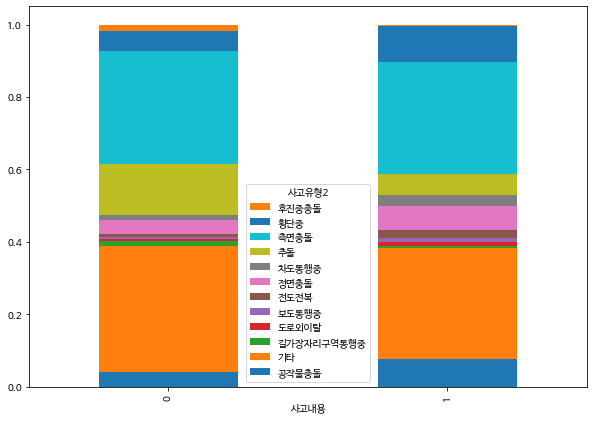

In [ ]:
df_obj=df_one.groupby(['사고내용','사고유형2']).count()['일시']
df_por=df_obj.unstack().T/df_obj.groupby('사고내용').sum()
df_por.T.plot.bar(stacked=True, legend='reverse', figsize=(10,7))

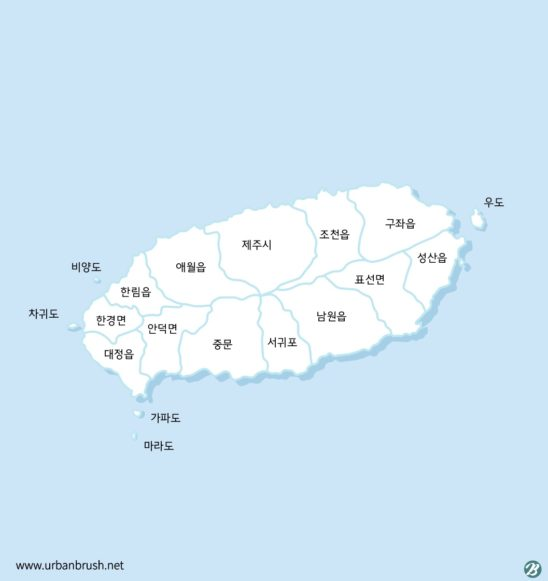

In [ ]:
df_one['읍면동'].unique()

array(['애월읍', '삼도이동', '남원읍', '성산읍', '조천읍', '호근동', '이호일동', '한림읍', '용담이동',
       '건입동', '표선면', '중문동', '연동', '이도이동', '안덕면', '강정동', '구좌읍', '오등동',
       '서호동', '대정읍', '색달동', '오라이동', '이도일동', '서귀동', '하원동', '화북이동', '동홍동',
       '토평동', '도두이동', '일도일동', '외도일동', '용담일동', '우도면', '도두일동', '하효동', '한경면',
       '서홍동', '도평동', '노형동', '회수동', '도순동', '일도이동', '해안동', '대포동', '법환동',
       '삼양삼동', '도남동', '도련일동', '오라삼동', '상효동', '이호이동', '용담삼동', '상예동', '내도동',
       '오라일동', '신효동', '봉개동', '삼도일동', '아라일동', '도련이동', '아라이동', '삼양일동',
       '회천동', '하예동', '영평동', '영남동', '화북일동', '외도이동', '용강동', '삼양이동', '월평동',
       '보목동'], dtype=object)

In [ ]:
제주=['일도일동','일도이동','이도일동','삼도일동','삼도이동','건임동','용담일동','용담삼동','오라일동','오라삼동','아라이동','도두일동','도두이동','이호일동','이호이동','용담이동','화북일동','외도일동','도평동','노형동','연동','도남동','이도이동','화북이동','도련일동','해안동','오라이동','오동동','아라일동','월평동','용감동','봉개동','외천동','건입동','오등동','삼양동','삼양일동','삼양이동','삼양삼동','내도동','도련일동','도련이동','회천동','영평동','외도일동','외도이동','용강동']
서귀포=['강정동','대포동','도순동','동홍동','법환동','보목동','상예동','상효동','색달동','서귀동','서호동','서홍동','신효동','영남동','월평동','중문동','토평동','하예동','하원동','하효동','호근동','회수동']

In [ ]:
df_one.loc[df_one['읍면동'].isin(제주),'읍면동'] = '제주시'

In [ ]:
df_one.loc[df_one['읍면동'].isin(서귀포),'읍면동'] = '서귀포시'

In [ ]:
df_one['읍면동'].unique()

array(['애월읍', '제주시', '남원읍', '성산읍', '조천읍', '서귀포시', '한림읍', '표선면', '안덕면',
       '구좌읍', '대정읍', '우도면', '한경면'], dtype=object)

# **변수간 관계**

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


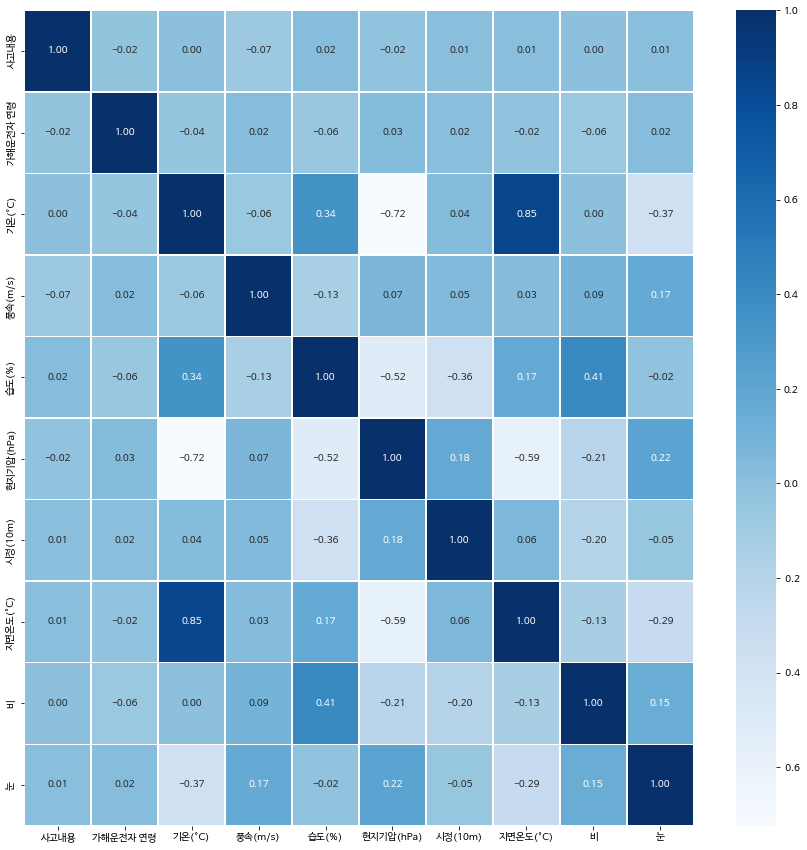

In [ ]:
# 히트맵
plt.figure(figsize=(15,15))
sns.heatmap(data=df_one.corr(),annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues'
)

In [ ]:
# 다중공선성

In [ ]:
df_one.columns

Index(['일시', '주말/공휴일', '사고내용', '도로형태', '가해운전자 차종', '가해운전자 성별', '가해운전자 연령', '시',
       '읍면동', '기온(°C)', '풍속(m/s)', '습도(%)', '현지기압(hPa)', '시정(10m)', '지면온도(°C)',
       '비', '눈', '도로상태', '사고유형2', '사고유형1'],
      dtype='object')

In [ ]:
dfX = df_one[['가해운전자 연령','기온(°C)', '풍속(m/s)', '습도(%)','현지기압(hPa)', '시정(10m)', '지면온도(°C)', '비', '눈']]
dfX

,가해운전자 연령,기온(°C),풍속(m/s),습도(%),현지기압(hPa),시정(10m),지면온도(°C),비,눈
0,29,11.9,3.4,63.0,1024.6,2000.0,12.4,0,0
1,42,10.7,1.4,69.0,1023.7,2000.0,8.8,0,0
2,47,11.2,0.7,70.0,1019.6,2000.0,9.1,0,0
3,24,11.9,0.2,90.0,1017.2,1494.0,10.7,1,0
4,20,10.5,1.1,76.0,1017.4,1266.0,7.9,0,0
...,...,...,...,...,...,...,...,...,...
2733,57,8.0,2.5,60.0,1027.2,4660.0,6.9,0,1
2734,21,10.9,5.4,57.0,1020.8,2380.0,9.2,1,0
2735,22,10.4,5.7,60.0,1018.4,1749.0,10.3,1,0
2736,22,8.2,3.7,45.0,1018.5,2000.0,9.9,1,0


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(dfX.values, i) for i in range(dfX.shape[1])]
vif['features'] = dfX.columns
vif = vif.sort_values('VIF Factor').reset_index(drop=True)
vif

,VIF Factor,features
0,1.264948,눈
1,2.336149,비
2,4.328745,풍속(m/s)
3,8.764182,가해운전자 연령
4,12.132600,시정(10m)
5,20.750738,지면온도(°C)
6,31.472614,습도(%)
7,32.439547,기온(°C)
8,56.343410,현지기압(hPa)


### **PCA**

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
# pca는 스케일에 예민하므로 미리 정규화를 취해주었다.
from sklearn.preprocessing import MinMaxScaler

minmax_scaler = MinMaxScaler() 
dfsc = minmax_scaler.fit_transform(dfX.loc[:,['시정(10m)','지면온도(°C)','습도(%)','기온(°C)','현지기압(hPa)']]) # test 

In [ ]:
pca_weather = PCA()
pca_weather.fit(dfsc)
df_pca = pca_weather.transform(dfsc)

In [ ]:
component_names = [f"PC{i+1}" for i in range(dfsc.shape[1])]
df_pca = pd.DataFrame(df_pca, columns=component_names)
df_pca

,PC1,PC2,PC3,PC4,PC5
0,0.338780,0.014215,0.042060,-0.091017,-0.048049
1,0.362339,-0.074039,0.074764,-0.071763,-0.048258
2,0.314775,-0.089615,0.073866,-0.013563,-0.028469
3,0.188174,-0.305543,0.054635,-0.069712,-0.009106
4,0.292271,-0.217881,-0.037742,-0.004931,-0.031277
...,...,...,...,...,...
2718,0.509706,0.188595,0.536392,-0.033045,0.044106
2719,0.381653,0.061662,0.092025,0.020865,-0.028989
2720,0.345769,-0.015916,-0.019943,0.028002,-0.011425
2721,0.449413,0.126550,-0.036885,0.088159,0.021229


In [ ]:
loadings = pd.DataFrame(
    pca_weather.components_.T,  # transpose the matrix of loadings
    columns=component_names,  # so the columns are the principal components
    index=dfX.loc[:,['시정(10m)','지면온도(°C)','습도(%)','기온(°C)','현지기압(hPa)']].columns,  # and the rows are the original features
)
loadings

,PC1,PC2,PC3,PC4,PC5
시정(10m),0.036592,0.365917,0.911345,0.086266,0.163626
지면온도(°C),-0.532136,0.373487,-0.190630,-0.449258,0.582379
습도(%),-0.335815,-0.809393,0.353401,-0.316562,0.083707
기온(°C),-0.655658,0.224220,0.064779,0.004689,-0.718066
현지기압(hPa),0.415731,0.145674,0.063410,-0.830958,-0.333818


In [ ]:
def plot_variance(pca, width=8, dpi=100):
    # Create figure
    # fig, axs = plt.subplots(1, 1)
    n = pca.n_components_
    grid = np.arange(1, n + 1)
    # Explained variance
    evr = pca.explained_variance_ratio_
    plt.figure(figsize=(10,8),dpi=100)
    plt.bar(grid, evr,color='steelblue')
    plt.xlabel("Component")
    plt.title("% Explained Variance")
    plt.ylim(0.0, 1.0)
    
    plt.tick_params(direction='in')
    # # Cumulative Variance
    # cv = np.cumsum(evr)
    # axs[1].plot(np.r_[0, grid], np.r_[0, cv], "o-")
    # axs[1].set(
    #     xlabel="Component", title="% Cumulative Variance", ylim=(0.0, 1.0)
    # )
    # Set up figure
    # plt.figure(figsize=(10,8),dpi=600)
    plt.show()

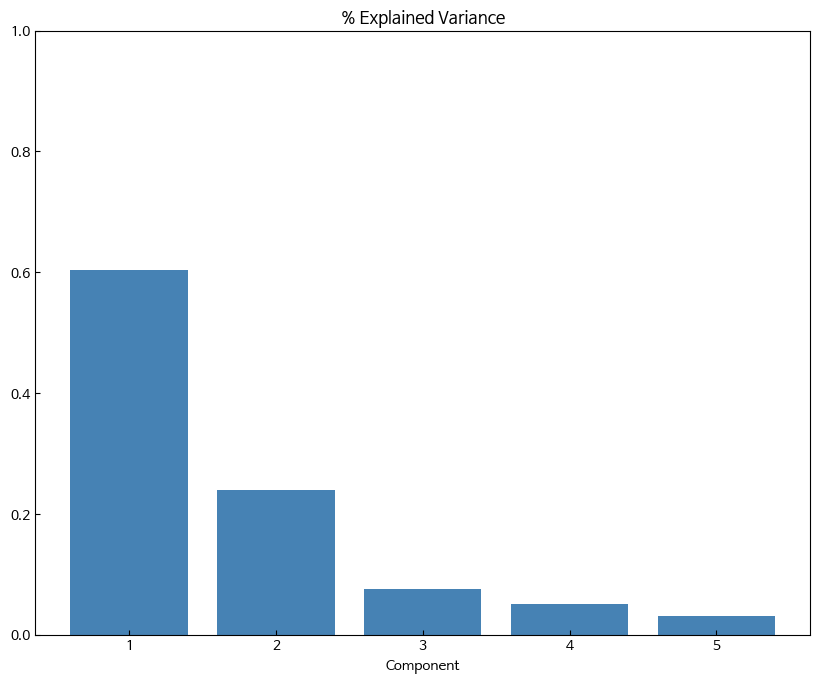

In [ ]:
plot_variance(pca_weather)

In [ ]:
df_pca = pd.DataFrame(df_pca, columns=component_names)

In [ ]:
df_one.index = range(len(df_one))

In [ ]:
df_one.loc[:,'weather1'] = df_pca['PC1']
df_one.loc[:,'weather2'] = df_pca['PC2']

In [ ]:
df_one.pop('시정(10m)')
df_one.pop('지면온도(°C)')
df_one.pop('습도(%)')
df_one.pop('기온(°C)')
df_one.pop('현지기압(hPa)')

0       1024.6
1       1023.7
2       1019.6
3       1017.2
4       1017.4
         ...  
2718    1027.2
2719    1020.8
2720    1018.4
2721    1018.5
2722    1029.5
Name: 현지기압(hPa), Length: 2723, dtype: float64

In [ ]:
df_one

,일시,주말/공휴일,사고내용,도로형태,가해운전자 차종,가해운전자 성별,가해운전자 연령,시,읍면동,풍속(m/s),비,눈,도로상태,사고유형2,사고유형1,weather1,weather2
0,2017-01-01 15:00:00,1,0,기타 - 기타,승용,남,29,제주,애월읍,3.4,0,0,건조,기타,차대차,0.338780,0.014215
1,2017-01-01 18:00:00,1,1,단일로 - 기타,승용,남,42,제주,제주시,1.4,0,0,건조,차도통행중,차대사람,0.362339,-0.074039
2,2017-01-01 21:00:00,1,1,교차로 - 교차로안,승용,남,47,서귀포,남원읍,0.7,0,0,건조,전도전복,차량단독,0.314775,-0.089615
3,2017-01-02 10:00:00,0,0,교차로 - 교차로안,승용,남,24,서귀포,성산읍,0.2,1,0,건조,측면충돌,차대차,0.188174,-0.305543
4,2017-01-03 21:00:00,0,0,단일로 - 기타,승용,남,20,서귀포,성산읍,1.1,0,0,건조,공작물충돌,차량단독,0.292271,-0.217881
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2718,2021-12-28 12:00:00,0,0,교차로 - 교차로부근,승용,남,57,제주,제주시,2.5,0,1,건조,횡단중,차대사람,0.509706,0.188595
2719,2021-12-29 11:00:00,0,0,단일로 - 기타,승용,여,21,제주,제주시,5.4,1,0,건조,횡단중,차대사람,0.381653,0.061662
2720,2021-12-29 14:00:00,0,0,단일로 - 기타,승용,여,22,제주,한림읍,5.7,1,0,건조,측면충돌,차대차,0.345769,-0.015916
2721,2021-12-30 12:00:00,0,0,단일로 - 기타,승용,남,22,서귀포,서귀포시,3.7,1,0,건조,기타,차대차,0.449413,0.126550


# **최종데이터**

In [ ]:
df_one


,일시,주말/공휴일,사고내용,도로형태,가해운전자 차종,가해운전자 성별,가해운전자 연령,시,읍면동,풍속(m/s),비,눈,도로상태,사고유형2,사고유형1,weather1,weather2
0,2017-01-01 15:00:00,1,0,기타 - 기타,승용,남,29,제주,애월읍,3.4,0,0,건조,기타,차대차,0.338780,0.014215
1,2017-01-01 18:00:00,1,1,단일로 - 기타,승용,남,42,제주,제주시,1.4,0,0,건조,차도통행중,차대사람,0.362339,-0.074039
2,2017-01-01 21:00:00,1,1,교차로 - 교차로안,승용,남,47,서귀포,남원읍,0.7,0,0,건조,전도전복,차량단독,0.314775,-0.089615
3,2017-01-02 10:00:00,0,0,교차로 - 교차로안,승용,남,24,서귀포,성산읍,0.2,1,0,건조,측면충돌,차대차,0.188174,-0.305543
4,2017-01-03 21:00:00,0,0,단일로 - 기타,승용,남,20,서귀포,성산읍,1.1,0,0,건조,공작물충돌,차량단독,0.292271,-0.217881
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2718,2021-12-28 12:00:00,0,0,교차로 - 교차로부근,승용,남,57,제주,제주시,2.5,0,1,건조,횡단중,차대사람,0.509706,0.188595
2719,2021-12-29 11:00:00,0,0,단일로 - 기타,승용,여,21,제주,제주시,5.4,1,0,건조,횡단중,차대사람,0.381653,0.061662
2720,2021-12-29 14:00:00,0,0,단일로 - 기타,승용,여,22,제주,한림읍,5.7,1,0,건조,측면충돌,차대차,0.345769,-0.015916
2721,2021-12-30 12:00:00,0,0,단일로 - 기타,승용,남,22,서귀포,서귀포시,3.7,1,0,건조,기타,차대차,0.449413,0.126550


In [ ]:
df_one.pop('시')

0        제주
1        제주
2       서귀포
3       서귀포
4       서귀포
       ... 
2718     제주
2719     제주
2720     제주
2721    서귀포
2722     제주
Name: 시, Length: 2723, dtype: object

In [ ]:
df_one.pop('가해운전자 상해정도')
df_one.pop('사고유형')

In [ ]:
df_one.to_csv('/content/drive/MyDrive/cj E2-3/data/최종데이터.csv')

In [ ]:
import plotly.express as px

fig = px.line(x=['a','b','c'], y=[1,3,2], title='sample figure')
fig.show()